In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
input_dim = x_train.shape[1]
encoding_dim = 32

# Input layer
input_img = Input(shape=(input_dim,))
# Encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# Decoder layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.3686 - val_loss: 0.3134
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.3033 - val_loss: 0.2998
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2950 - val_loss: 0.2945
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2909 - val_loss: 0.2911
Epoch 5/10
235/235 [==============================] - 8s 35ms/step - loss: 0.2879 - val_loss: 0.2888
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2857 - val_loss: 0.2868
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2839 - val_loss: 0.2853
Epoch 8/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2825 - val_loss: 0.2842
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2816 - val_loss: 0.2832
Epoch 10/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2806 - val_lo

313/313 [==============================] - 1s 4ms/step


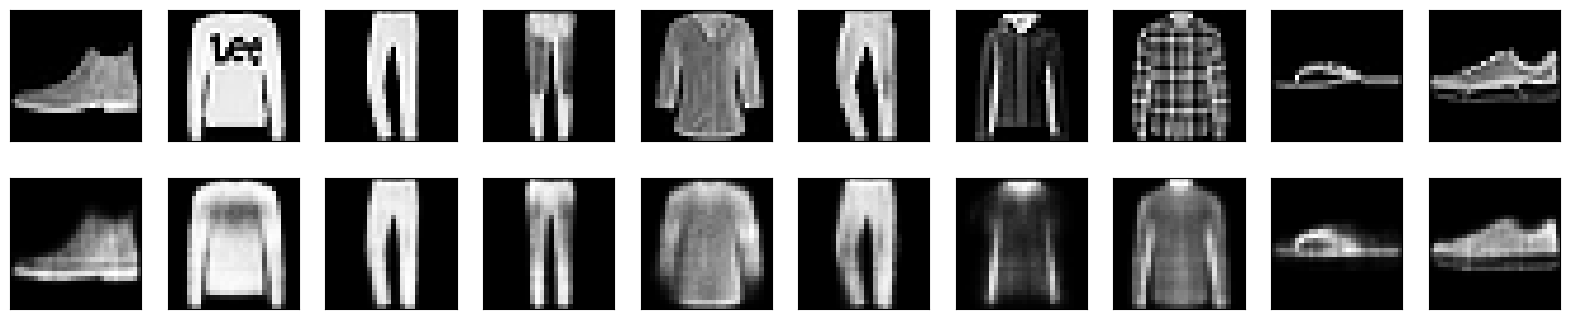

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10 # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


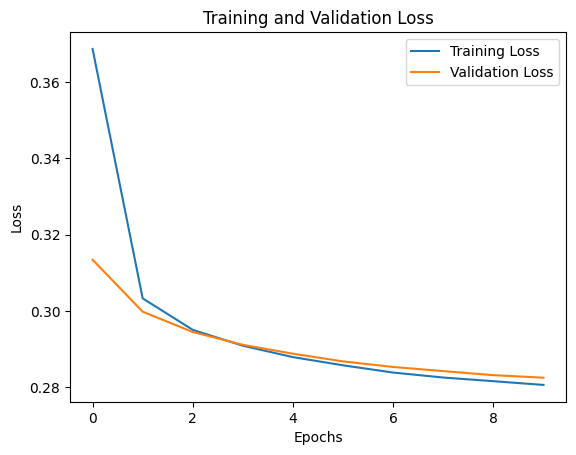

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()